# 时间序列中最基本的概念
很多人看不懂时间序列的公式、很多人看不懂时间序列的数据、代码、数学函数。
本文就是将数据、公式、代码、数学函数串联起来，让你不仅仅了解抽象的数学公式，也能将抽象的内容联系到具体的数据和python代码中。


In [9]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("../datasets/近20年城镇就业人员数据(万人).csv", index_col=['year'])
data.head(4)

,value
year,
2001,24123
2002,25159
2003,26230
2004,27293


[Text(2001, 0, '2001'),
 Text(2002, 0, '2002'),
 Text(2003, 0, '2003'),
 Text(2004, 0, '2004'),
 Text(2005, 0, '2005'),
 Text(2006, 0, '2006'),
 Text(2007, 0, '2007'),
 Text(2008, 0, '2008'),
 Text(2009, 0, '2009'),
 Text(2010, 0, '2010'),
 Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020')]

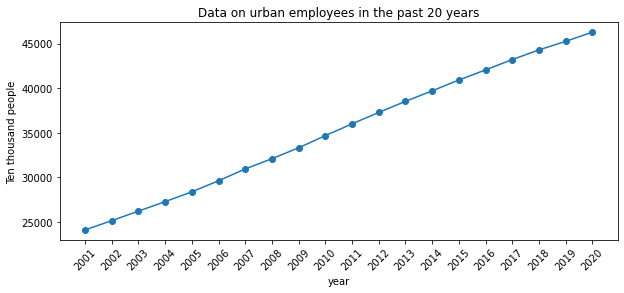

In [11]:
# 可视化
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data.index, data['value'], 'o-')
ax.set_title(u"Data on urban employees in the past 20 years")
ax.set_ylabel("Ten thousand people")
ax.set_xlabel("year")
ax.set_xticks(data.index)
ax.set_xticklabels(data.index, rotation=45)

# lag（滞后）
经常在时间序列里面可以看到lag这个东西，大白话就是叫滞后；
举个例子来说：

1. lag1代表滞后数据1项，也就是2002年的数据滞后1年得到的就是2001年的数据；2003年的数据滞后1年就是2002年的数据；
2. lag2代表滞后数据2项，也就是2003年的数据滞后2年得到2001年的数据；2004年的数据滞后2年就是2002年的数据；
3. 依次类推，滞后数据就是这么计算的。

下面使用python对上面的【近20年城镇就业人员数据(万人)】数据做个滞后处理。

In [12]:
# 使用pandas的shift可以做lag
data1 = data.copy()
# data1['value_lag1'] = data1['value'].shift(1)
# data1['value_lag2'] =  data1['value'].shift(2)
for i in [1, 2, 3, 4, 5]:
    data1[f"value_lag{i}"] = data1['value'].shift(i)
data1.head(10)

,value,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
year,,,,,,
2001,24123,NaN,NaN,NaN,NaN,NaN
2002,25159,24123.0,NaN,NaN,NaN,NaN
2003,26230,25159.0,24123.0,NaN,NaN,NaN
2004,27293,26230.0,25159.0,24123.0,NaN,NaN
2005,28389,27293.0,26230.0,25159.0,24123.0,NaN
2006,29630,28389.0,27293.0,26230.0,25159.0,24123.0
2007,30953,29630.0,28389.0,27293.0,26230.0,25159.0
2008,32103,30953.0,29630.0,28389.0,27293.0,26230.0
2009,33322,32103.0,30953.0,29630.0,28389.0,27293.0


1. 因为2001年之前是没有数据了，所以2001年滞后一项得到的数据是空数据；
2. 因为2002年之前是没有数据，所以2002年滞后两项也是没有数据的。
3. 依次类推。

# 时间序列的公式

经常看到时间序列的公式写的乱七八糟的，这是一堆公式，那是一堆公式，活活把人绕晕。现在为了我们说明需要，我们定义几个简单的公式：

假设我们的时间序列是`value = [4,3,2,10,3]`。我们把这个时间序列定义为 $ X_{t} $；
那么这个时间序列里面每一个元素对应的符号依次是：$x_1$、$x_2$、$x_3$等。 

如果$X_t$做了lag1，得到的时间序列为`value lag1=[nan, 4,3,2,10]`，记这个新的时间序列为$X_{t-1}$。

如果$X_t$做了lag2，得到的时间序列为`value lag2=[nan,nan, 4,3,2]`，记这个新的时间序列为$X_{t-2}$。

以此类推，就是一个简单的时间序列公式了。

# 统计基础知识

1. 均值:$\mu = \frac{\sum X}{n}$


2. 方差：$S^2 = \frac{\sum(X-\mu)^2}{n-1}$


3. 协方差：$Cov(X,Y) = E\{|EX - X| |EY-Y|\}$


4. 相关系数: $\gamma(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}}$

# 自相关系数

## 自相关基础计算
在了解上面的【统计基础知识】后，再理解自相关性基本上就不难了，自相关是变量与自身在不同时间滞后下的相关性。对于延迟$k$阶的时间序列。自协方差为$c_k$，自相关性系数为$\gamma_k$

1. $c_k = \frac{1}{n}\sum_{i=1}^{n-k}(x_t - \overline{x})(x_{t+k}-\overline{x})$


2. $\gamma_k = \frac{c_k}{c_0}$

### 调用包计算acf数值

In [60]:
# 使用statsmodels包的acf函数
from statsmodels.tsa.stattools import acf

### 自己根据公式写函数

In [61]:
def cal_acf(x, nlags):
    """
    按照公式自己写个acf函数
    只是用来帮助理解，不建议用在别的环境中
    """
    x = np.array(x)
    mean_x = np.mean(x)
    length_x = x.shape[0]
    c_0 = np.mean((x-mean_x) **2)
    c_k = np.sum((x[:(length_x-nlags)] - mean_x) * (x[nlags:] - mean_x)) / length_x
    r_k = c_k / c_0
    return r_k

### 两种结果对比

In [62]:
# 结果汇总
pd.DataFrame({'index':np.arange(11),
             'value_by_myself':[cal_acf(x=data['value'], nlags=i) for i in range(11)],
             'value_by_statsmodels':acf(data.value,nlags=10)})


/opt/anaconda3/envs/devc/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


,index,value_by_myself,value_by_statsmodels
0,0,1.000000,1.000000
1,1,0.858910,0.858910
2,2,0.715601,0.715601
3,3,0.570864,0.570864
4,4,0.427266,0.427266
5,5,0.287384,0.287384
6,6,0.154147,0.154147
7,7,0.031085,0.031085
8,8,-0.082773,-0.082773
9,9,-0.184306,-0.184306


## 自相关系数画图

画图有两种方法：
1. 直接使用`statsmodels`的`plot_acf`;
2. 使用`acf`函数来计算数据，得到数据后再进行可视化，这种一般便于自己定制，也方便自己做更多的细节调整之类的。

(-1.0, 15.5)

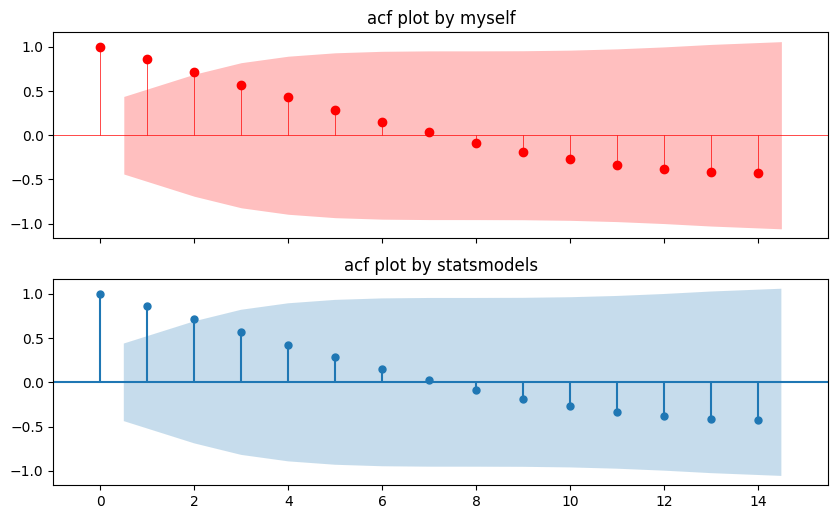

In [63]:
# 自己画一个
# 自己计算
acf_value, acf_interval, _, _ = acf(data.value,nlags=14,qstat=True,alpha=0.05, fft=False)

xlabel = np.arange(start=0, stop=acf_value.shape[0], dtype='float')

fig, ax = plt.subplots(nrows=2, figsize=(10,6), sharex=True, dpi=100)
ax[0].hlines(y=0, xmin=np.min(xlabel)-2, xmax=np.max(xlabel)+2, colors='red', linewidth=0.5)
ax[0].scatter(x=xlabel, y=acf_value, c='red')
ax[0].vlines(x = xlabel, ymin=0, ymax=acf_value, colors='red', linewidth=0.5)
xlabel[1] -= 0.5
xlabel[-1] += 0.5
ax[0].fill_between(x=xlabel[1:], y1=acf_interval[1:,0] - acf_value[1:], y2=acf_interval[1:, 1]-acf_value[1:], alpha=0.25, linewidth=0, color='red')
ax[0].set_title("acf plot by myself")


# 使用别人写好的函数

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['value'], ax=ax[1])
ax[1].set_title("acf plot by statsmodels")
ax[1].set_xlim(-1, np.max(xlabel)+1)

# 偏自相关系数

偏自相关系数可以被看成一种条件相关，两个变量之间有相关性是基于一系列的其他的条件变量。
想象一个这样的问题：

我们有一个Y变量，这个Y变量和$X_1$、$X_2$相关，还有一个变量$X_3$。那我要知道$Y$和$X_3$是否相关应该怎么计算？

肯定是应该要剔除掉$X_1$、$X_2$对$Y$、对$X_3$的影响。那么计算$Y$和$X_3$的相关性就是为：

$\gamma(X_3, Y) = \frac{Cov(X_3, Y | X_1,X_2)}{\sqrt{Var(X_3|X_1,X_2)Var(Y|X_1, X_2)}}$

那么对于一个时间序列来说，$X_t$ 和$X_{t-h}$之间的偏自相关系数：就是基于 $X_{t-h+1}$、$X_{t-h+2}$、$X_{t-h+3}$、…… $X_{t-1}$对$X_t$ 和$X_{t-h}$的影响，计算$X_t$ 和$X_{t-h}$之间相关系数。

## 偏自相关计算公式：
1. 当h=1的时候，我们考虑的就是$X_t$ 和$X_{t-1}$之间的偏自相关系数,这个时候中间是没有别的条件序列的，所以偏自相关系数就是等于自相关系数。
2. 当h=2的时候，我们考虑的就是$X_t$ 和$X_{t-2}$之间的偏自相关系数，这个时候中间的条件序列就是$X_{t-1}$，所以偏自相关系数就是为:

$\gamma(X_{t-2}, X_t) = \frac{Cov(X_{t-2}, X_t| X_{t-1})}{\sqrt{Var(X_{t-2}|X_{t-1})Var(X_{t}|X_{t-1})}}$.

3. 当h=3的时候，我们考虑的就是$X_t$ 和$X_{t-3}$之间的偏自相关系数，这个时候中间的条件序列就是$X_{t-1}$、$X_{t-2}$，所以偏自相关系数就是为:

$\gamma(X_{t-3}, X_t) = \frac{Cov(X_{t-3}， X_t | X_{t-1}，X_{t-2} )}{\sqrt{Var(X_{t-3} | X_{t-1}，X_{t-2} ) Var(X_{t} | X_{t-1}，X_{t-2} )}}$.

4. 依次类推。

## 偏自相关计算：

1. 使用statsmodels的pacf函数，这个函数可以选择不同的计算方法，有使用ols方法的，也有使用Yule-Walker方法的。
2. 除了方法1调用包，我们还可以使用公式方法，分别使用ols方法、使用Yule-Walker方法来计算pacf的系数。实际上算出来的结果和statsmodels的pacf函数算出来的结果是一模一样的。

在下面的代码块中，我们使用statsmodels包里面的pacf、pacf_ols、pacf_yw函数计算偏自相关系数，另外我们自己通过ols理论和Yule-Walker理论计算偏自相关系数。

In [64]:
# 使用statsmodels包的pacf函数
from statsmodels.tsa.stattools import pacf,pacf_ols,pacf_yw
from scipy.linalg import toeplitz

# 自己实现用ols求解pacf的函数
from numpy.dual import lstsq
from statsmodels.tools import add_constant
from statsmodels.tsa.tsatools import lagmat

def cal_my_pacf_ols(x, nlags=5):
    """
    自己实现pacf，原理使用的就是ols(最小二乘法)
    :param x:
    :param nlags:
    :return:
    """
    pacf = np.empty(nlags+1) * 0
    pacf[0] = 1.0

    xlags, x0 = lagmat(x, nlags, original="sep")
    xlags = add_constant(xlags)

    for k in range(1, nlags+1):
        params = lstsq(xlags[k:, :(k+1)], x0[k:], rcond=None)[0]
        pacf[k] = params[-1]

    return pacf




def cal_my_yule_walker(x, nlags=5):
    """
    自己实现yule_walker理论
    :param x:
    :param nlags:
    :return:
    """
    x = np.array(x, dtype=np.float64)
    x -= x.mean()
    n = x.shape[0]

    r = np.zeros(shape=nlags+1, dtype=np.float64)
    r[0] = (x ** 2).sum()/n

    for k in range(1, nlags+1):
        r[k] = (x[0:-k] * x[k:]).sum() / (n-k*1)


    R = toeplitz(c=r[:-1])
    result = np.linalg.solve(R, r[1:])
    return result

def cal_my_pacf_yw(x, nlags=5):
    """
    自己通过yule_walker方法求出pacf的值
    :param x:
    :param nlags:
    :return:
    """
    pacf = np.empty(nlags+1) * 0
    pacf[0] = 1.0
    for k in range(1, nlags+1):
        pacf[k] = cal_my_yule_walker(x,nlags=k)[-1]

    return pacf

cal_my_pacf_yw(x=data.values)

# 结果比较

pd.DataFrame({'pacf':pacf(data.value,nlags=5, method='ols'),
              'pacf_ols':pacf_ols(data.value,nlags=5),
              'pacf_yw':pacf_yw(data.value,nlags=5),
              'pacf_ols_bymyself':cal_my_pacf_ols(x=data.values),
              'pacf_yw_bymyself':cal_my_pacf_yw(x=data.values)})



,pacf,pacf_ols,pacf_yw,pacf_ols_bymyself,pacf_yw_bymyself
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997827,0.997827,0.904116,0.997827,0.904116
2,-0.700485,-0.700485,-0.122213,-0.700485,-0.122213
3,-0.051486,-0.051486,-0.136953,-0.051486,-0.136953
4,-0.575253,-0.575253,-0.144965,-0.575253,-0.144965
5,-0.226133,-0.226133,-0.156852,-0.226133,-0.156852


## 偏自相关系数画图

画图有两种方法：
1. 直接使用`statsmodels`的`plot_pacf`;
2. 使用`pacf`函数来计算数据，得到数据后再进行可视化，这种一般便于自己定制，也方便自己做更多的细节调整之类的。

(-1.0, 16.5)

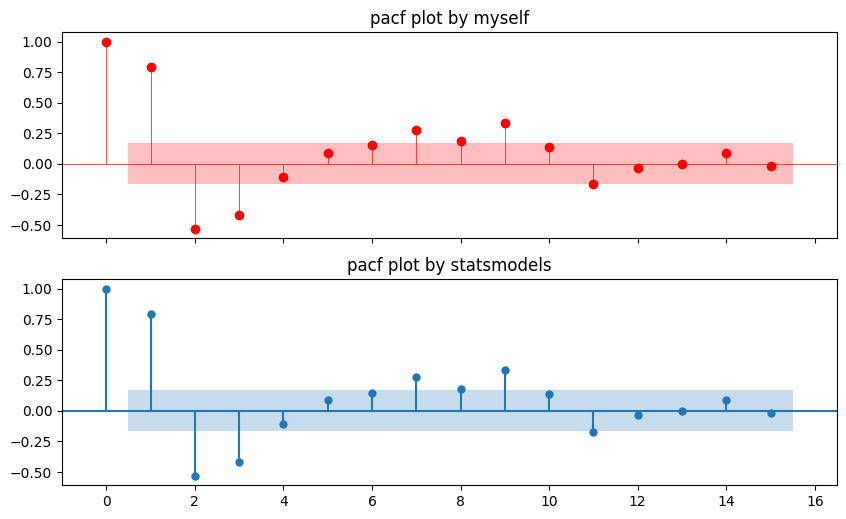

In [94]:
sunspotarea = pd.read_csv("../datasets/sunspotarea.csv",parse_dates=['date'])


# 自己画一个
# 自己计算
pacf_value, pacf_interval = pacf(sunspotarea.value,nlags=15,alpha=0.05)

xlabel = np.arange(start=0, stop=pacf_value.shape[0], dtype='float')

fig, ax = plt.subplots(nrows=2, figsize=(10,6), sharex=True, dpi=100)
ax[0].hlines(y=0, xmin=np.min(xlabel)-2, xmax=np.max(xlabel)+2, colors='red', linewidth=0.5)
ax[0].scatter(x=xlabel, y=pacf_value, c='red')
ax[0].vlines(x = xlabel, ymin=0, ymax=pacf_value, colors='red', linewidth=0.5)
xlabel[1] -= 0.5
xlabel[-1] += 0.5
ax[0].fill_between(x=xlabel[1:], y1=pacf_interval[1:,0] - pacf_value[1:], y2=pacf_interval[1:, 1]-pacf_value[1:], alpha=0.25, linewidth=0, color='red')
ax[0].set_title("pacf plot by myself")


# 使用别人写好的函数


from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sunspotarea.value, ax=ax[1], lags=15)
ax[1].set_title("pacf plot by statsmodels")
ax[1].set_xlim(-1, np.max(xlabel)+1)
